# Mean Salary Case

In [2]:
import pandas as pd

mean_salary = pd.read_csv('ilc_di17_linear_2_0-Mean-income.csv')
mean_salary.sample(1)

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,freq,Time frequency,unit,Unit of measure,indic_il,Income and living conditions indicator,deg_urb,...,geo,Geopolitical entity (reporting),TIME_PERIOD,Time,OBS_VALUE,Observation value,OBS_FLAG,Observation status (Flag) V2 structure,CONF_STATUS,Confidentiality status (flag)
93586,dataflow,ESTAT:ILC_DI17(1.0),Mean and median income by degree of urbanisation,A,Annual,EUR,Euro,MEI_E,Mean equivalised net income,DEG3,...,ES,Spain,2016,NaN,11888.0,NaN,NaN,NaN,NaN,NaN


In [28]:
import matplotlib.pylab as plt
romania_mean_salary = mean_salary[(mean_salary.geo == 'RO') & (mean_salary.indic_il == 'MED_E') & (mean_salary['Unit of measure'] == 'National currency')][['Sex', 'age', 'Age class', 'TIME_PERIOD', 'deg_urb', 'Degree of urbanisation' , 'OBS_VALUE']]

romania_mean_salary.sample(1)

,Sex,age,Age class,TIME_PERIOD,deg_urb,Degree of urbanisation,OBS_VALUE
131807,Males,Y_LT18,Less than 18 years,2015,DEG3,Rural areas,5800.0


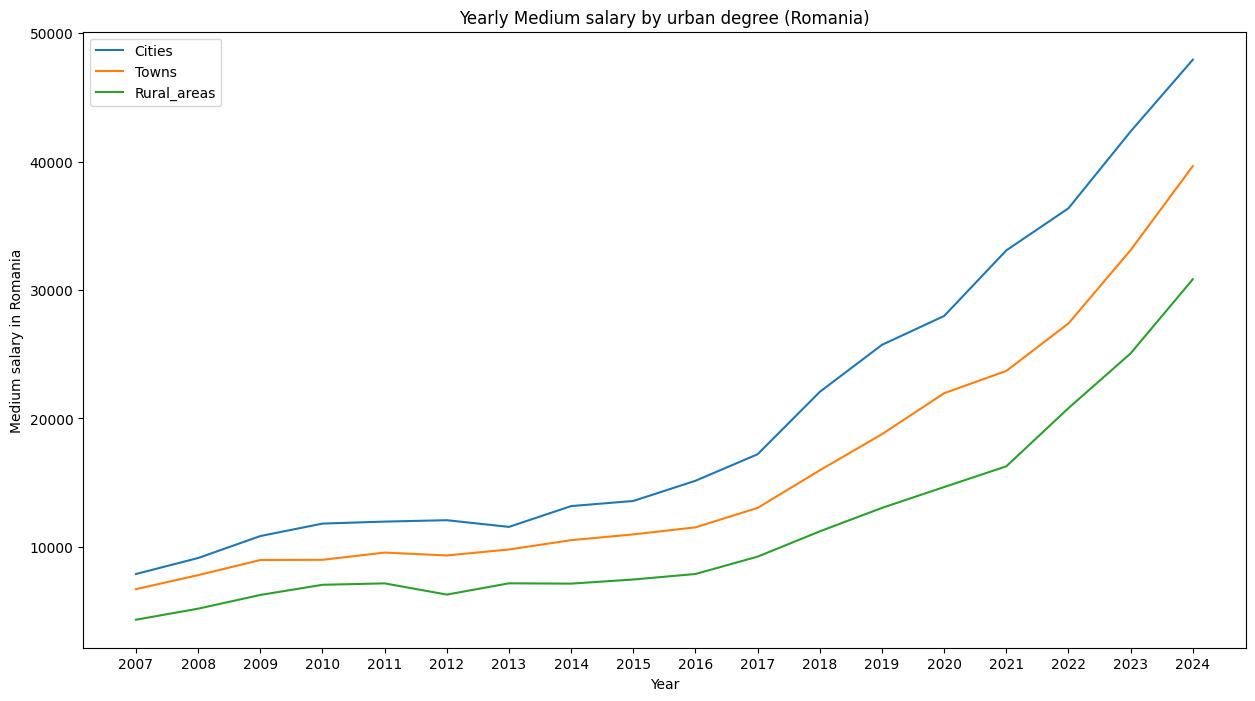

In [30]:
# let's plot how it changed over time for each Degree of urbanisation
romania_mean_salary_total_age_gender = romania_mean_salary[(romania_mean_salary['Sex'] == 'Total') & (romania_mean_salary['age'] == 'TOTAL')]

Cities = romania_mean_salary_total_age_gender[romania_mean_salary_total_age_gender.deg_urb == 'DEG1']
Towns = romania_mean_salary_total_age_gender[romania_mean_salary_total_age_gender.deg_urb == 'DEG2']
Rural_areas = romania_mean_salary_total_age_gender[romania_mean_salary_total_age_gender.deg_urb == 'DEG3']

plt.figure(figsize=(15, 8))
plt.plot(
    Cities.TIME_PERIOD,
    Cities.OBS_VALUE,
    label='Cities')

plt.plot(
    Towns.TIME_PERIOD,
    Towns.OBS_VALUE,
    label='Towns')

plt.plot(
    Rural_areas.TIME_PERIOD,
    Rural_areas.OBS_VALUE,
    label='Rural_areas')

plt.xlabel("Year")
plt.ylabel("Medium salary in Romania")
plt.title("Yearly Medium salary by urban degree (Romania)")
plt.legend()
plt.xticks(Cities.TIME_PERIOD)

Cities.to_csv('Cities.csv', index=False)